# British English vowels recognition
The problem inspected is outlined on the [UC Irvine website](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Vowel+Recognition+-+Deterding+Data%29)

In [5]:
# Load data
from data import speakers, words, vowel_data
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

### The words recorded in the experiment were:

In [6]:
words

['hid', 'hId', 'hEd', 'hAd', 'hYd', 'had', 'hOd', 'hod', 'hUd', 'hud', 'hed']

### There also were the following 15 speakers:

In [7]:
speakers

['Andrew',
 'Bill',
 'David',
 'Mark',
 'Jo',
 'Kate',
 'Penny',
 'Rose',
 'Mike',
 'Nick',
 'Rich',
 'Tim',
 'Sarah',
 'Sue',
 'Wendy']

In [8]:
vowel_data

[[[-3.639, 0.418, -0.67, 1.779, -0.168, 1.627, -0.388, 0.529, -0.874, -0.814],
  [-3.327, 0.496, -0.694, 1.365, -0.265, 1.933, -0.363, 0.51, -0.621, -0.488],
  [-2.12, 0.894, -1.576, 0.147, -0.707, 1.559, -0.579, 0.676, -0.809, -0.049],
  [-2.287, 1.809, -1.498, 1.012, -1.053, 1.06, -0.567, 0.235, -0.091, -0.795],
  [-2.598, 1.938, -0.846, 1.062, -1.633, 0.764, 0.394, -0.15, 0.277, -0.396],
  [-2.852, 1.914, -0.755, 0.825, -1.588, 0.855, 0.217, -0.246, 0.238, -0.365],
  [-3.482, 2.524, -0.433, 1.048, -1.995, 0.902, 0.322, 0.45, 0.377, -0.366],
  [-3.941, 2.305, 0.124, 1.771, -1.815, 0.593, -0.435, 0.992, 0.575, -0.301],
  [-3.86, 2.116, -0.939, 0.688, -0.675, 1.679, -0.512, 0.928, -0.167, -0.434],
  [-3.648, 1.812, -1.378, 1.578, 0.065, 1.577, -0.466, 0.702, 0.06, -0.836],
  [-3.032,
   1.739,
   -1.141,
   0.737,
   -0.834,
   1.386,
   -0.575,
   0.679,
   -0.018,
   -0.823]],
 [[-3.653, 0.373, -0.6, 1.705, -0.222, 1.765, -0.353, 0.537, -0.797, -0.813],
  [-3.237, 0.436, -0.86, 1.363

\**each of the speakers was recorded 6 times which results in 90 blocks of 10-float data for each vowel*
#### So, blocks 1-6 were Andrew's, Bill worked over blocks 7-12 and so on<br>
### Let's see what we have in the input data

In [9]:
import pandas as pd
data_pandas = pd.DataFrame(vowel_data)
data_pandas.columns = words
data_pandas

,hid,hId,hEd,hAd,hYd,had,hOd,hod,hUd,hud,hed
0,"[-3.639, 0.418, -0.67, 1.779, -0.168, 1.627, -...","[-3.327, 0.496, -0.694, 1.365, -0.265, 1.933, ...","[-2.12, 0.894, -1.576, 0.147, -0.707, 1.559, -...","[-2.287, 1.809, -1.498, 1.012, -1.053, 1.06, -...","[-2.598, 1.938, -0.846, 1.062, -1.633, 0.764, ...","[-2.852, 1.914, -0.755, 0.825, -1.588, 0.855, ...","[-3.482, 2.524, -0.433, 1.048, -1.995, 0.902, ...","[-3.941, 2.305, 0.124, 1.771, -1.815, 0.593, -...","[-3.86, 2.116, -0.939, 0.688, -0.675, 1.679, -...","[-3.648, 1.812, -1.378, 1.578, 0.065, 1.577, -...","[-3.032, 1.739, -1.141, 0.737, -0.834, 1.386, ..."
1,"[-3.653, 0.373, -0.6, 1.705, -0.222, 1.765, -0...","[-3.237, 0.436, -0.86, 1.363, -0.251, 1.915, -...","[-2.135, 0.954, -1.632, 0.121, -0.704, 1.6, -0...","[-2.304, 1.784, -1.506, 0.981, -0.961, 0.806, ...","[-2.54, 2.144, -1.024, 0.933, -1.567, 1.024, 0...","[-2.826, 2.003, -0.738, 0.801, -1.669, 0.939, ...","[-3.582, 2.374, -0.358, 1.162, -1.953, 0.621, ...","[-3.951, 2.25, 0.127, 1.772, -1.906, 0.567, -0...","[-3.783, 1.974, -1.2, 0.606, -0.65, 1.504, -0....","[-3.673, 1.811, -1.405, 1.621, 0.044, 1.572, -...","[-2.946, 1.649, -1.167, 0.788, -0.909, 1.3, -0..."
2,"[-3.665, 0.337, -0.641, 1.791, -0.194, 1.686, ...","[-3.165, 0.408, -0.971, 1.207, -0.298, 1.921, ...","[-2.105, 1.035, -1.705, 0.231, -0.558, 1.554, ...","[-2.312, 1.746, -1.51, 1.019, -0.99, 0.941, -0...","[-2.635, 2.147, -1.129, 0.911, -1.407, 1.095, ...","[-2.887, 2.131, -0.83, 0.682, -1.557, 0.818, 0...","[-3.635, 2.25, -0.394, 1.012, -1.693, 0.117, 0...","[-3.986, 2.325, 0.102, 1.633, -2.014, 0.576, -...","[-3.712, 1.816, -1.171, 0.647, -0.767, 1.698, ...","[-3.74, 1.832, -1.384, 1.587, 0.049, 1.642, -0...","[-2.859, 1.627, -1.14, 0.769, -0.948, 1.39, -0..."
3,"[-3.624, 0.305, -0.708, 1.758, -0.194, 1.675, ...","[-3.062, 0.351, -1.071, 1.061, -0.355, 1.99, -...","[-2.081, 1.05, -1.778, 0.411, -0.518, 1.46, -0...","[-2.289, 1.845, -1.616, 0.987, -0.876, 1.044, ...","[-2.724, 2.067, -1.142, 0.923, -1.157, 1.17, -...","[-3.015, 2.232, -0.899, 0.574, -1.331, 0.546, ...","[-3.559, 2.126, -0.445, 1.053, -1.765, 0.349, ...","[-4.074, 2.281, 0.152, 1.556, -1.613, -0.047, ...","[-3.618, 1.576, -1.14, 0.699, -0.741, 1.633, -...","[-3.687, 1.784, -1.593, 1.603, 0.123, 1.424, -...","[-2.69, 1.652, -1.261, 0.674, -0.964, 1.449, -..."
4,"[-3.593, 0.29, -0.782, 1.707, -0.175, 1.662, -...","[-3.046, 0.387, -1.165, 0.94, -0.386, 1.978, -...","[-2.255, 0.902, -1.723, 0.454, -0.524, 1.453, ...","[-2.299, 1.848, -1.695, 1.065, -0.861, 1.047, ...","[-2.911, 1.928, -1.131, 0.899, -0.911, 1.111, ...","[-3.089, 2.339, -0.973, 0.463, -1.169, 0.543, ...","[-3.459, 2.086, -0.595, 0.937, -1.841, 0.6, 0....","[-4.208, 2.447, 0.049, 1.331, -2.088, 0.585, -...","[-3.543, 1.391, -1.22, 0.699, -0.769, 1.579, -...","[-3.684, 1.774, -1.728, 1.611, 0.1, 1.393, -0....","[-2.596, 1.56, -1.249, 0.656, -1.095, 1.292, -..."
5,"[-3.604, 0.235, -0.836, 1.786, -0.153, 1.642, ...","[-3.171, 0.49, -1.128, 0.911, -0.388, 2.014, -...","[-2.302, 0.85, -1.646, 0.455, -0.488, 1.491, -...","[-2.368, 1.727, -1.556, 1.162, -0.819, 0.941, ...","[-3.141, 1.873, -1.131, 0.941, -0.759, 1.224, ...","[-3.065, 2.372, -1.002, 0.496, -1.295, 0.86, 0...","[-3.473, 2.178, -0.82, 0.706, -1.71, 0.779, 0....","[-4.238, 2.437, 0.036, 1.158, -2.127, 0.554, 0...","[-3.546, 1.258, -1.227, 0.823, -0.702, 1.734, ...","[-3.869, 1.86, -1.646, 1.612, 0.044, 1.531, -0...","[-2.666, 1.516, -1.198, 0.741, -1.066, 1.24, -..."
6,"[-4.102, 0.209, 0.414, 0.423, 0.985, 1.434, 0....","[-1.372, -0.03, -1.003, -0.388, -0.471, 1.141,...","[-1.816, 0.458, -0.947, -0.341, 0.085, 0.75, 0...","[-1.954, 1.595, -1.593, 0.37, -0.136, 0.022, 0...","[-2.654, 2.39, -0.008, 0.07, -1.063, 0.304, -0...","[-2.321, 1.303, 0.32, -0.085, -0.278, 0.001, -...","[-3.141, 3.314, -0.996, -0.394, -0.19, -0.312,...","[-3.941, 3.353, 0.486, -0.506, -1.12, 0.101, 0...","[-4.161, 2.937, 0.157, 0.336, -0.968, 0.641, 0...","[-4.52, 2.231, -0.088, 0.513, -0.528, 1.

## As suggested by the dataset's author, we will split the data for train and test in the following manner:
**Train**: first 8 speakers, i.e. blocks 0-47<br>
**Test**: last 7 speakers, i.e. blocks 48-89<br>

In [10]:
TRAIN_SIZE = 8 * 6 # Each speaker has 6 entries
TEST_SIZE = len(speakers) * 6 - TRAIN_SIZE # Each speaker has 6 entries

In [11]:
dataset = []
for block in vowel_data:
    dataset.extend(block)
dataset

[[-3.639, 0.418, -0.67, 1.779, -0.168, 1.627, -0.388, 0.529, -0.874, -0.814],
 [-3.327, 0.496, -0.694, 1.365, -0.265, 1.933, -0.363, 0.51, -0.621, -0.488],
 [-2.12, 0.894, -1.576, 0.147, -0.707, 1.559, -0.579, 0.676, -0.809, -0.049],
 [-2.287, 1.809, -1.498, 1.012, -1.053, 1.06, -0.567, 0.235, -0.091, -0.795],
 [-2.598, 1.938, -0.846, 1.062, -1.633, 0.764, 0.394, -0.15, 0.277, -0.396],
 [-2.852, 1.914, -0.755, 0.825, -1.588, 0.855, 0.217, -0.246, 0.238, -0.365],
 [-3.482, 2.524, -0.433, 1.048, -1.995, 0.902, 0.322, 0.45, 0.377, -0.366],
 [-3.941, 2.305, 0.124, 1.771, -1.815, 0.593, -0.435, 0.992, 0.575, -0.301],
 [-3.86, 2.116, -0.939, 0.688, -0.675, 1.679, -0.512, 0.928, -0.167, -0.434],
 [-3.648, 1.812, -1.378, 1.578, 0.065, 1.577, -0.466, 0.702, 0.06, -0.836],
 [-3.032, 1.739, -1.141, 0.737, -0.834, 1.386, -0.575, 0.679, -0.018, -0.823],
 [-3.653, 0.373, -0.6, 1.705, -0.222, 1.765, -0.353, 0.537, -0.797, -0.813],
 [-3.237, 0.436, -0.86, 1.363, -0.251, 1.915, -0.395, 0.751, -0.774, -

In [12]:
train = dataset[0:TRAIN_SIZE*len(words)]
train_answer = [i for i in range(len(words))] * TRAIN_SIZE
train_answer

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2

In [13]:
test = dataset[-TEST_SIZE*len(words):]
test_answer = [i for i in range(len(words))] * TEST_SIZE
test

[[-1.149, -0.904, -1.988, 0.739, -0.06, 1.206, 0.864, 1.196, -0.3, -0.467],
 [-2.613, -0.092, -0.54, 0.484, 0.389, 1.741, 0.198, 0.257, -0.375, -0.604],
 [-2.505, 0.632, -0.593, 0.304, 0.496, 0.824, -0.162, 0.181, -0.363, -0.764],
 [-1.768, 1.769, -1.142, -0.739, -0.086, 0.12, -0.23, 0.217, -0.009, -0.279],
 [-2.671, 3.155, -0.514, 0.133, -0.964, 0.234, -0.071, 1.192, 0.254, -0.471],
 [-2.509, 1.326, 0.354, 0.663, -0.724, 0.418, -0.496, 0.713, 0.638, -0.204],
 [-2.764, 1.111, 0.727, 1.54, -0.855, 0.261, -1.11, 0.227, 0.42, 0.991],
 [-3.816, 3.426, 0.224, -0.384, -1.733, 0.434, -0.322, 1.333, 0.653, 0.577],
 [-3.839, 1.248, 0.83, 0.982, -1.11, 0.617, -0.751, 0.084, 0.309, 1.125],
 [-4.982, 1.538, 0.96, 1.253, -0.64, 0.588, -0.484, -0.31, -0.246, 1.18],
 [-2.895, 0.682, -0.151, 0.218, -0.689, 1.118, -0.264, 0.922, 0.757, 0.327],
 [-1.093, -0.922, -2.091, 0.844, 0.009, 1.247, 0.891, 1.453, -0.089, -0.4],
 [-2.499, 0.119, -0.82, 0.346, 0.347, 1.696, 0.245, 0.689, -0.084, -0.596],
 [-2.633,

## Once the dataset is split, we resort to researching possible solutions
<img src="algorithms_comparison.png">

As we can see, the best algorithm for the specified problem back in 1989 was "Nearest neighbor"<br>
*Ok, let's try that*

In [114]:
correct = [0]*(len(train) - 1)
for n_neighbors in range(1, len(train)):
    X = np.array(train)
    y = np.array(train_answer)

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    for vowel_number, predicted_answer in enumerate(clf.predict(np.array(test))):
        if (predicted_answer == test_answer[vowel_number]):
            correct[n_neighbors - 1] += 1
n_neighbors = correct.index(max(correct)) + 1
print("The best result was {0:.2f}% at {1} nearest neighbors".format(100.0 * max(correct) / len(test), n_neighbors))

The best result was 60.82% at 6 nearest neighbors


## Let's plot the result

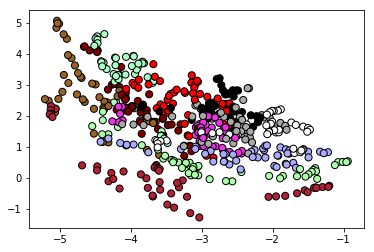

In [115]:
cmap = ListedColormap(['#B22234', '#AAFFAA', '#AAAAFF', '#FFFFFF', '#000000', '#a9a9a9', '#FF0000', '#aaffc3', '#800000', '#9A6324', '#f032e6'])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=50)
plt.show()

## Calculate the error depending on the number of features taken into account

In [116]:
errors = [0.0]*len(range(1, 10))
for number_of_features in range(1, 10):
    correct = [0]*(len(train) - 1)
    X = np.array([entry[:number_of_features] for entry in train])
    y = np.array(train_answer)

    h = .02  # step size in the mesh

    # Create color maps
    cmap_bold = ListedColormap(['#B22234', '#AAFFAA', '#AAAAFF', '#FFFFFF', '#000000', '#a9a9a9', '#FF0000', '#aaffc3', '#800000', '#9A6324', '#f032e6'])
    # cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    for vowel_number, predicted_answer in enumerate(clf.predict(np.array([entry[:number_of_features] for entry in test]))):
        if (predicted_answer != test_answer[vowel_number]):
            errors[number_of_features - 1] += 1
    errors[number_of_features - 1] *= 100.0/len(test)
errors

[74.24242424242424,
 55.62770562770563,
 55.62770562770563,
 54.97835497835498,
 46.103896103896105,
 47.61904761904762,
 44.37229437229437,
 41.34199134199134,
 40.90909090909091]

### Plot that

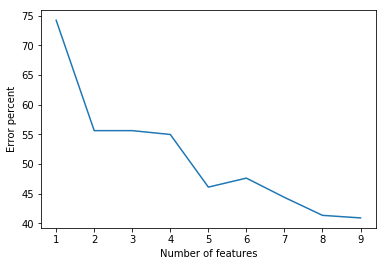

In [117]:
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Error percent")
plt.plot(range(1, 10), errors)
plt.show()